In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
ytest = ytest.reshape(-1,)

In [5]:
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [6]:
classes = ["plane","car","bird","cat","dear","dog","frog","horse","ship","truck"]

In [7]:
def sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

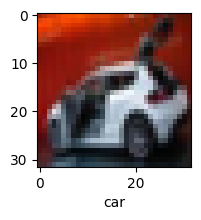

In [8]:
sample(xtest,ytest,6)

In [9]:
xtrain = xtrain/255
xtest = xtest/255

In [10]:
model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation= "relu",input_shape= (32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
    
    
])

In [11]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


In [12]:
model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4449 - accuracy: 0.4827
Epoch 2/15
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1055 - accuracy: 0.6147
Epoch 3/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9708 - accuracy: 0.6617
Epoch 4/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8866 - accuracy: 0.6919
Epoch 5/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8186 - accuracy: 0.7152
Epoch 6/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7576 - accuracy: 0.7391
Epoch 7/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7076 - accuracy: 0.7540
Epoch 8/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6620 - accuracy: 0.7713
Epoch 9/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6262 - accuracy: 0.7811
Epoch 10/15
1563/1563 [==============================] - 40s 26m

In [13]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 9ms/step - loss: 1.0901 - accuracy: 0.6987


[1.0900700092315674, 0.6987000107765198]

In [14]:
y_pred =model.predict(xtest)
y_pred[:3]

313/313 [==============================] - 3s 9ms/step


array([[4.9481860e-05, 1.7650075e-04, 9.4278381e-05, 9.1301090e-01,
        2.3954350e-05, 8.1815720e-02, 1.7597300e-03, 1.3380210e-04,
        2.8585270e-03, 7.7225661e-05],
       [6.1441011e-07, 3.4179652e-04, 1.9170462e-12, 9.9327335e-12,
        5.6890002e-13, 9.8207900e-13, 2.9420158e-14, 4.7433184e-14,
        9.9965727e-01, 3.5921548e-07],
       [1.5915396e-02, 2.1549460e-02, 3.0296760e-05, 1.5480537e-03,
        1.7995409e-03, 4.4423176e-04, 9.4964798e-07, 6.5073388e-04,
        8.8267505e-01, 7.5386234e-02]], dtype=float32)

In [15]:
y_pred1 = [np.argmax(element) for element in y_pred]
y_pred1[:3]

[3, 8, 8]

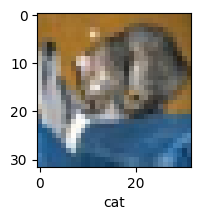

In [16]:
sample(xtest,ytest,0)

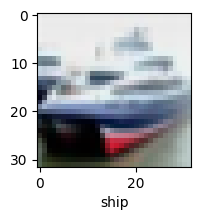

In [17]:
sample(xtest,ytest,1)